## Goals for this exercise
1. Implement MC 
2. Implement TD(0)
3. Implement TD(lambda)

In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

/Users/tongwang/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/tongwang/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [72]:
env = BlackjackEnv()

Implement every-visit MC

* Loop through episodes
* Write function G that given a full episode of an episode, returns returns for each intermediate state
* Use G to keep count of return and sums

In [8]:
# DEV
observation = env.reset()
observation
a = env.step(1)
print(a)

((21, 10, False), 0, False, {})


## First implement MC

In [30]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Nubmer of episodes to sample.
        discount_factor: Lambda discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    # Implement this!
                  
    # Loop through episodes. Construct lists 1) obervations 2) rewards
    for i_episode in range(num_episodes):
        observation, done = env.reset(), False
        observation_hist = [observation]
        reward_hist = []
        while not done:
            action = np.random.choice([0,1], p = policy(observation))
            observation, reward, done, _ = env.step(action)
            observation_hist.append(observation)
            reward_hist.append(reward)
        # Go through this episode history, calculate the total rewards for all intermediate states
        episode_length = len(reward_hist)
        for i in range(episode_length):
            observation = observation_hist[i]
            total_reward = 0
            for j in range(episode_length - i):
                total_reward += np.power(discount_factor, j) * reward_hist[i + j]
            returns_count[observation] += 1
            returns_sum[observation] += total_reward
    # Calulate V
    for observation in returns_count:
        V[observation] = returns_sum[observation] / returns_count[observation]
    
    return V    

In [24]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return np.array([1.0, 0.0]) if score >= 20 else np.array([0.0, 1.0])

In [29]:
# A slightly less dumb policy
def sample_policy2(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return np.array([1.0, 0.0]) if score >= 17 else np.array([0.0, 1.0])

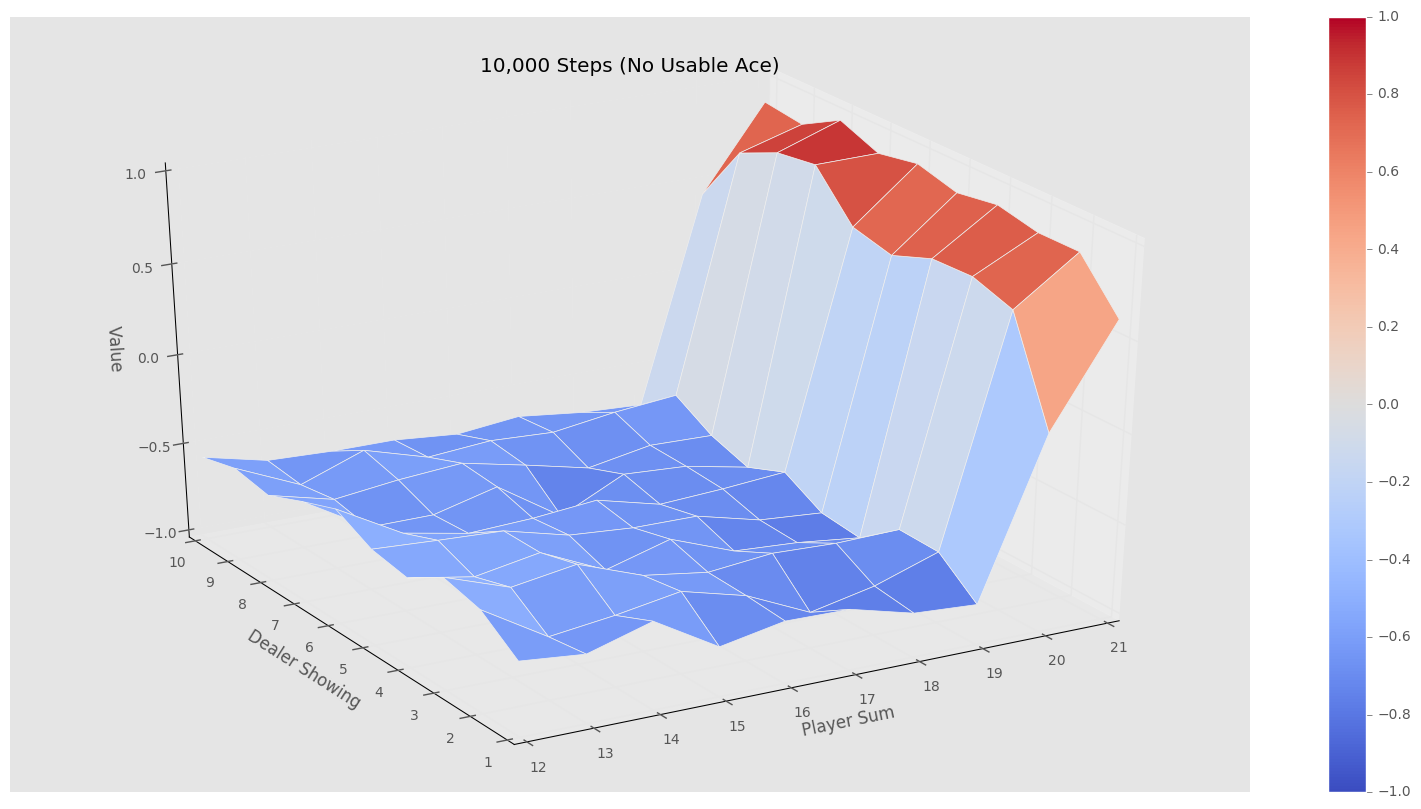

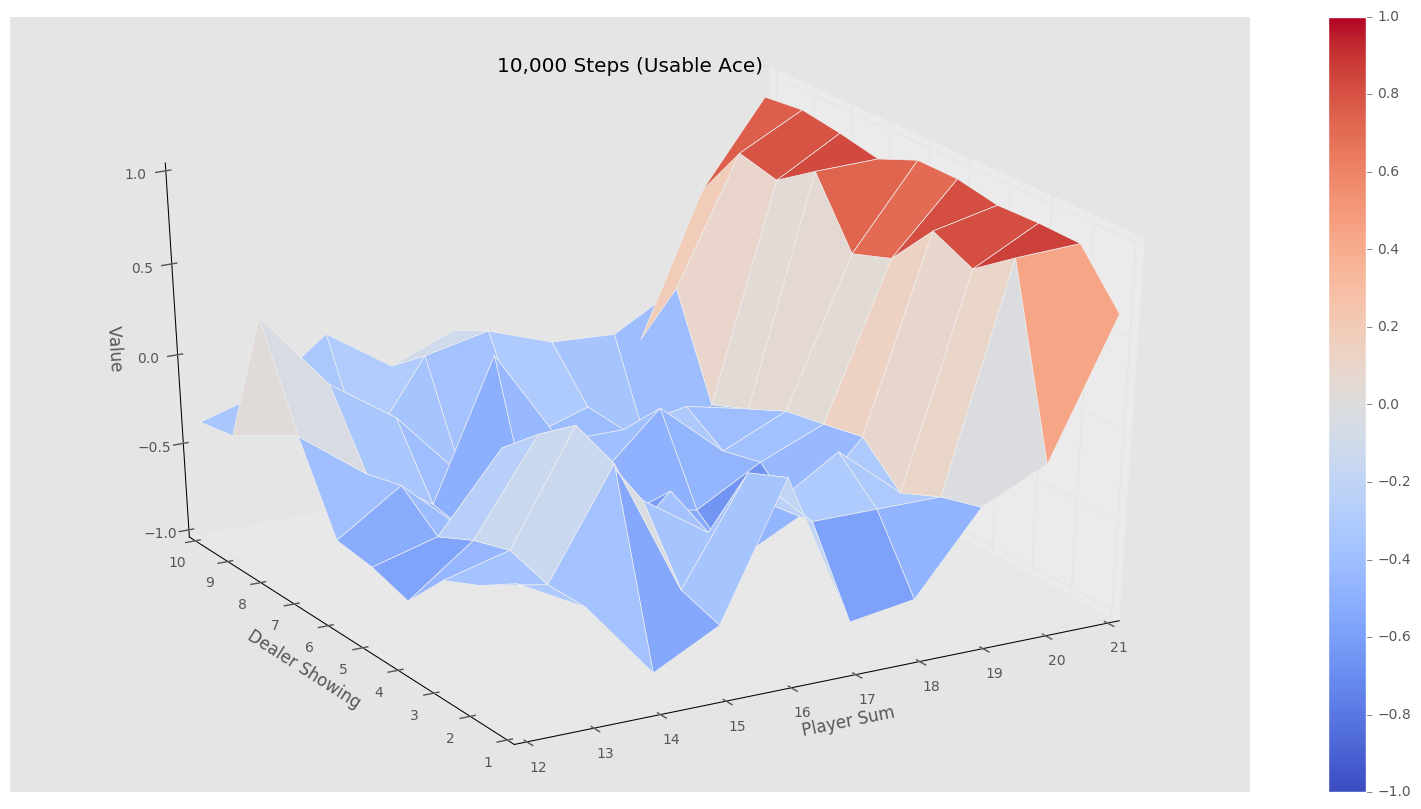

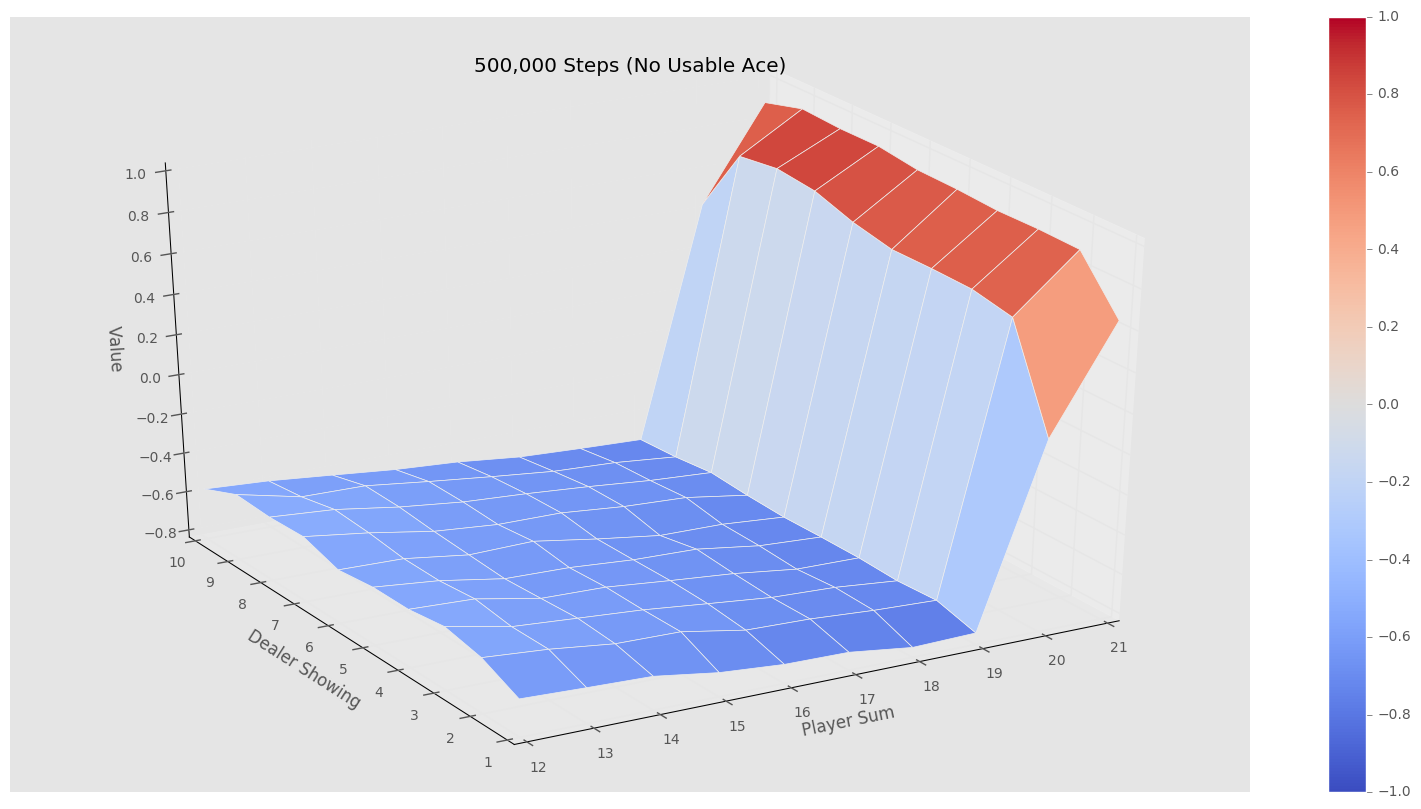

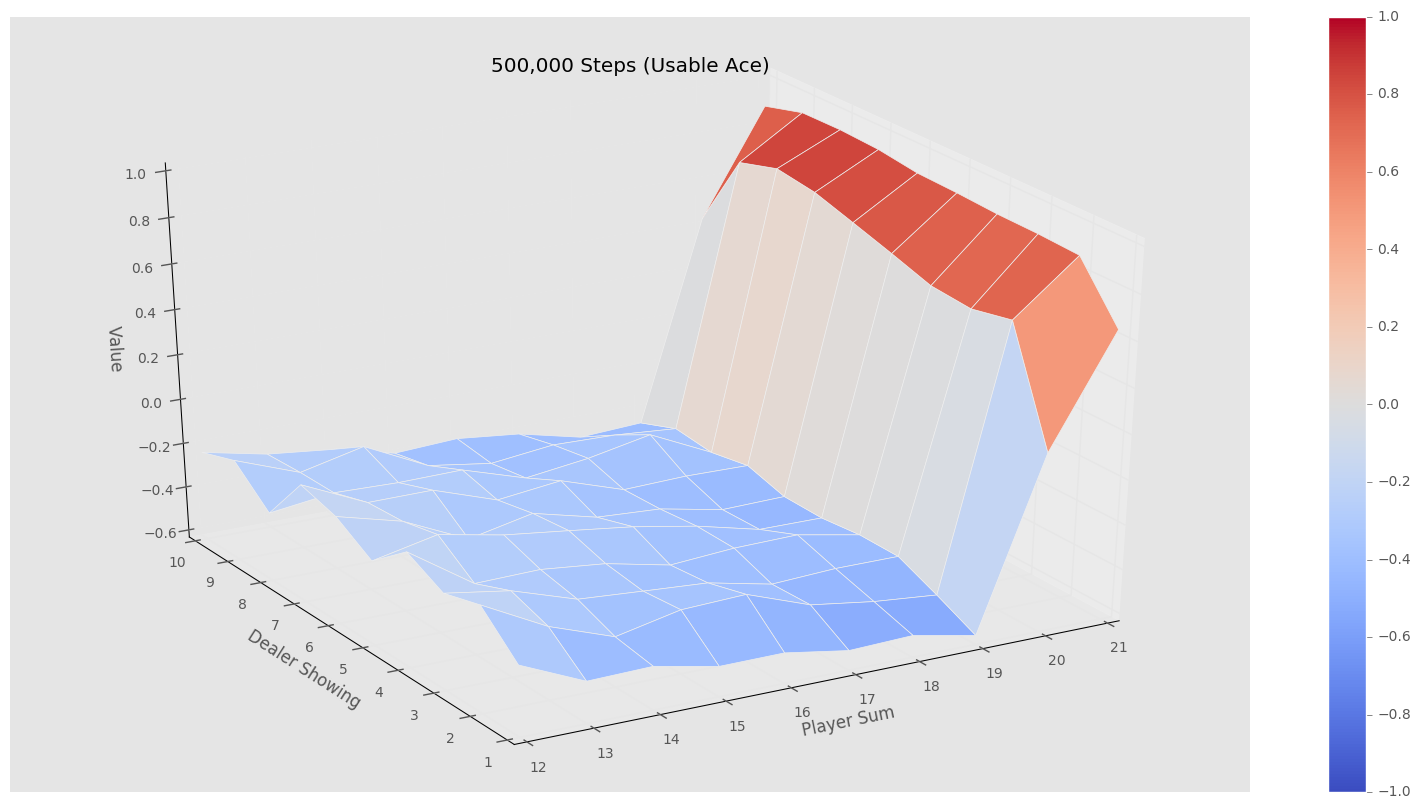

In [33]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")

__Success!__

## Now implement TD(0)

In [73]:
def td_prediction(policy, env, num_episodes, discount_factor=1.0, alpha=0.5):
    """
    Temporal Difference prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Nubmer of episodes to sample.
        discount_factor: Lambda discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """    
    # The final value function
    V = defaultdict(float)
        
    # Implement this!
    for i_episode in range(num_episodes):
        observation, done = env.reset(), False
        while not done:
            action = np.random.choice([0,1], p = policy(observation))
            next_observation, reward, done, _ = env.step(action)
            td_delta = alpha * (reward + discount_factor * V[next_observation] - V[observation])
            V[observation] += td_delta
            observation = next_observation
    return V    

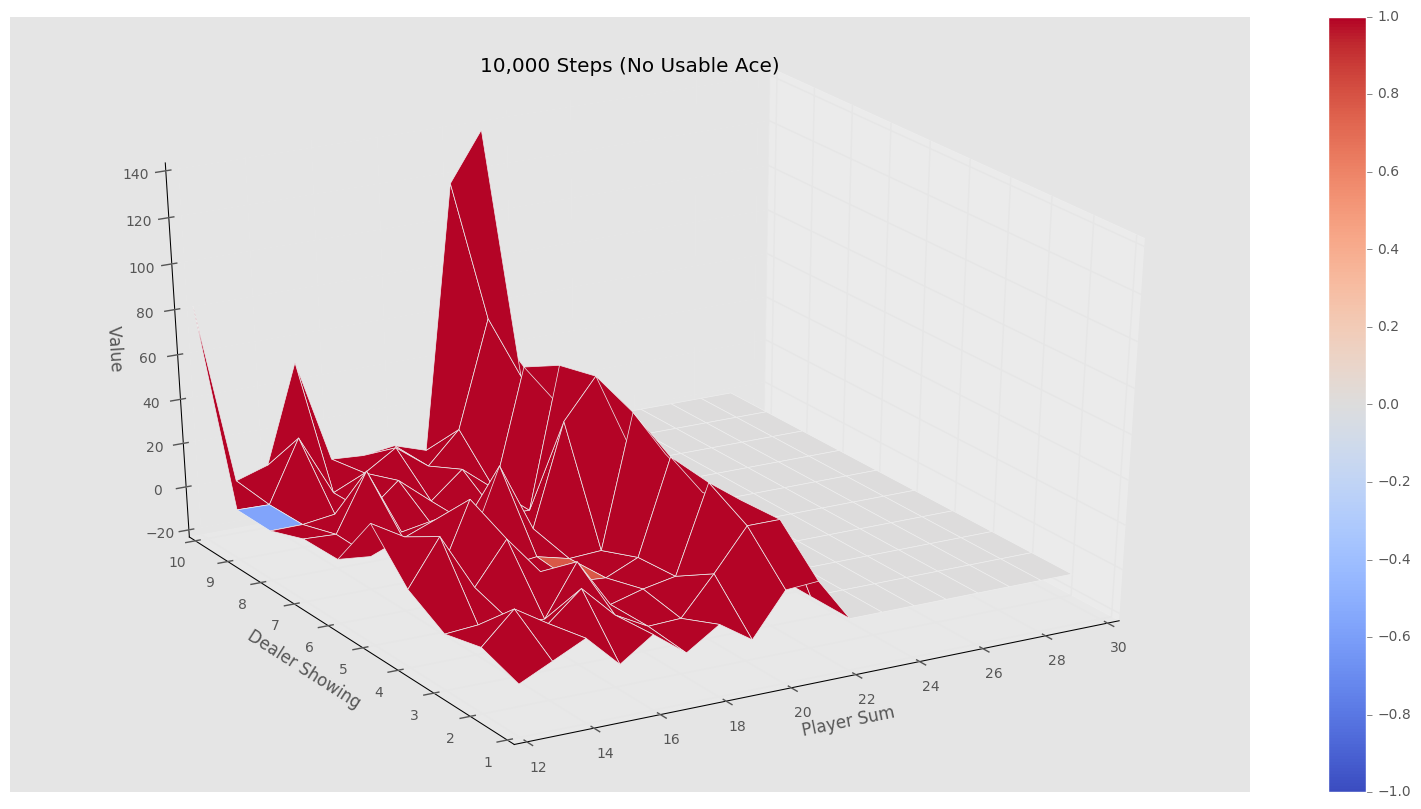

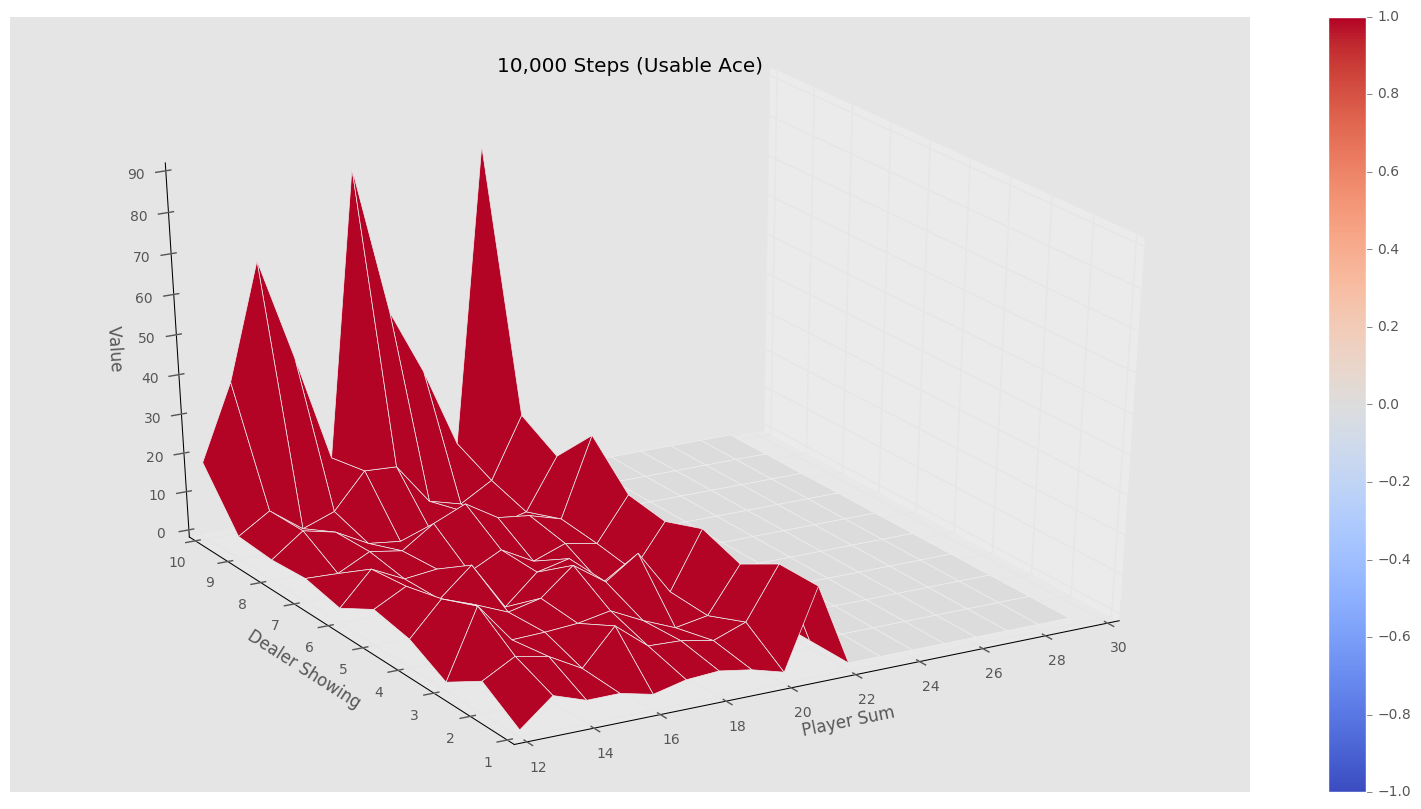

In [75]:
V_10k = td_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

#V_500k = td_prediction(sample_policy, env, num_episodes=500000)
#plotting.plot_value_function(V_500k, title="500,000 Steps")

### Why doesn't my TD(0) converge??